# LDA-SVM

In [57]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_noise_67.csv")
test_data = pd.read_csv("../ValidationData/neodata/fault_all_noise_67.csv")
#train_data.head()

Text(0.5, 1.0, 'Training data')

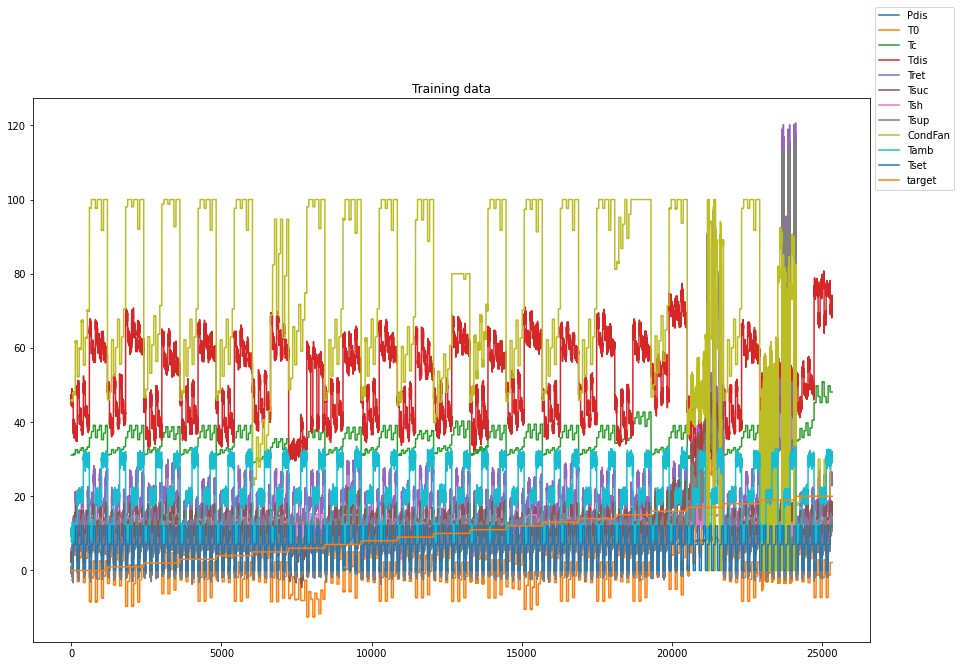

In [59]:
fig, axs = plt.subplots(figsize=(15,10))

axs.plot(train_data)
plt.legend(train_data.keys(), bbox_to_anchor=(1, 1), loc="center left")
plt.title('Training data')

In [60]:
#standardization
standardize = True

if standardize:
    import standardization as sd

    # Normalization / conditioning
    standardizer = sd.standardization(train_data,'target')

    trn = standardizer.transform(train_data)
    tst = standardizer.transform(test_data)
else:
    trn = train_data
    tst = test_data

targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_tst = test_data['target']

trn

,Pdis,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,Tamb,Tset,target
0,-1.031645,-0.509867,-1.088260,-0.335408,-0.886177,-1.080388,-1.156673,-0.707395,-1.032087,-1.070061,-1.286817,0
1,-1.032972,-0.509159,-1.089772,-0.312138,-0.885077,-0.956579,-1.158397,-0.667376,-1.034408,-1.113390,-1.286817,0
2,-1.031933,-0.509686,-1.088588,-0.342748,-0.934453,-0.793683,-1.157057,-0.784844,-1.032590,-1.182209,-1.286817,0
3,-1.031931,-0.509687,-1.088586,-0.551104,-0.969027,-0.789522,-1.157055,-0.630450,-1.032588,-1.037845,-1.286817,0
4,-1.031922,-0.509692,-1.088576,-0.273088,-0.939239,-1.018913,-1.157043,-0.740520,-1.032572,-1.370475,-1.286817,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25321,3.991120,0.065070,3.691327,1.599437,0.407313,0.375330,0.958706,0.293091,-1.647970,1.286949,1.151363,20
25322,3.991584,0.064860,3.691703,1.795552,0.352922,0.555618,0.959062,0.251450,-1.647970,1.240727,1.151363,20
25323,3.989893,0.065660,3.690334,1.824238,0.397649,0.564482,0.957739,0.284866,-1.647970,1.094393,1.151363,20
25324,3.989341,0.065948,3.689888,1.714518,0.376671,0.458927,0.957284,0.275030,-1.647970,1.443362,1.151363,20


# LDA    

Preserving 99.69% of variance


,0,1,2,3,4,target
0,-0.001659,-0.021523,0.137785,-0.067474,0.006387,0.0
1,-0.003559,-0.027233,0.147075,-0.063864,0.000283,0.0
2,0.000737,-0.041623,0.098629,-0.066570,0.017015,0.0
3,0.010578,0.083402,-0.018316,0.036107,-0.025713,0.0
4,-0.005312,-0.069070,0.148469,-0.045202,0.009891,0.0
...,...,...,...,...,...,...
25321,0.489895,-0.362795,-0.080457,-0.098610,-0.350792,20.0
25322,0.478062,-0.481314,-0.002633,-0.101243,-0.350113,20.0
25323,0.476248,-0.480978,0.028522,-0.128312,-0.343811,20.0
25324,0.482606,-0.432710,-0.031176,-0.099381,-0.355099,20.0


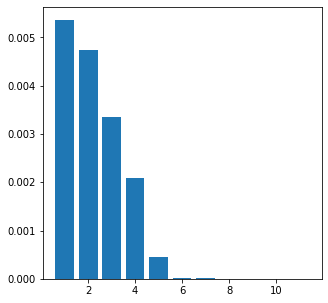

In [61]:
from lda import LDA_reducer as reducer
lda = reducer(trn,5,'target')
LDA = lda.transform(trn)
LDA_tst = lda.transform(tst)
LDA

<Figure size 432x288 with 0 Axes>

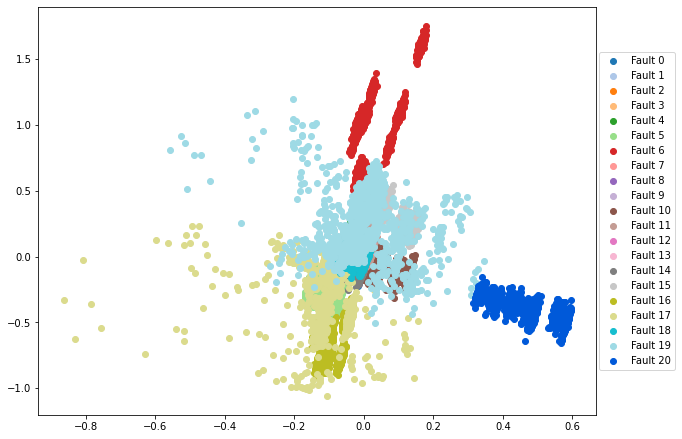

In [62]:
import plot_functions as pf

pf.plot_transformation(pd.DataFrame(LDA).assign(target=train_data['target']),'LDA_data.pdf','target',True)

# SVM

In [63]:
from sklearn import svm

clf_svm = svm.SVC( C=1000, decision_function_shape="ovo",gamma=0.01,verbose=True)#kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf_svm.fit(LDA.drop('target',axis=1), labels_trn)


[LibSVM]

SVC(C=1000, decision_function_shape='ovo', gamma=0.01, verbose=True)

In [64]:
#clf_svm.score(LDA,labels_trn)
predict = clf_svm.predict(LDA.drop('target',axis=1))

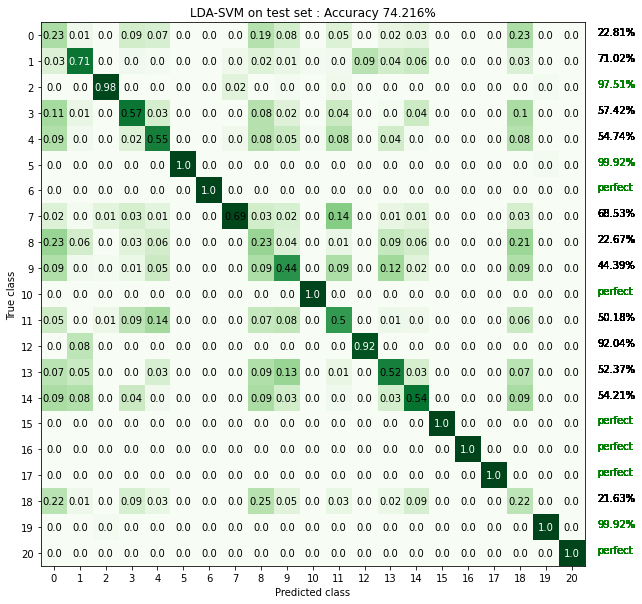

In [65]:
numbers = targets
truth = labels_trn

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on test set',save_fig_name='PDF/LDA-SVM confusion matrix.pdf')
pass

In [66]:
predict_tst = clf_svm.predict(LDA_tst.drop('target',axis=1))


<Figure size 432x288 with 0 Axes>

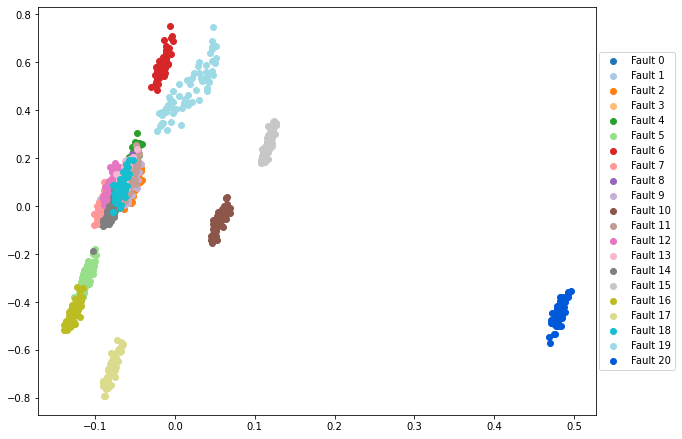

In [67]:
pf.plot_transformation(pd.DataFrame(LDA_tst).assign(target=test_data['target']),'LDA_val.pdf','target',True)

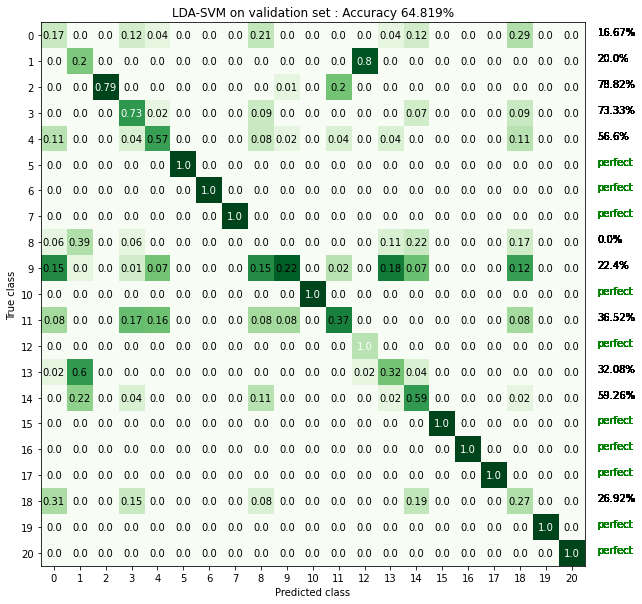

In [68]:
numbers = targets
truth = labels_tst

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict_tst,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA-SVM on validation set',save_fig_name='PDF/LDA-SVM confusion matrix Validation.pdf')
pass

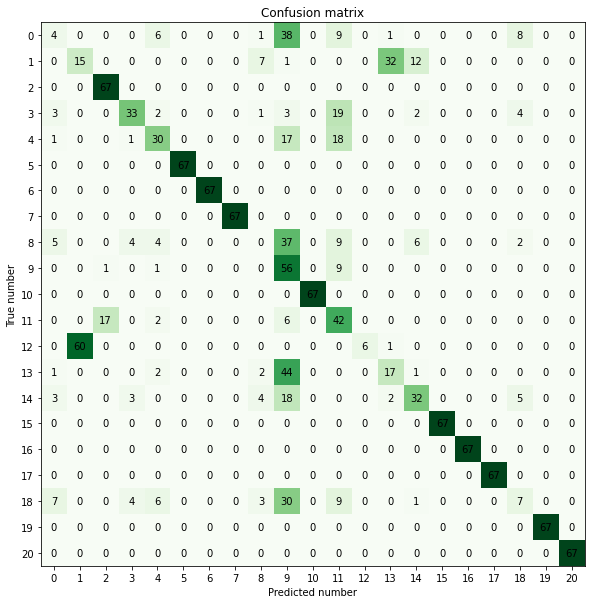

In [69]:
#confusion matrix
numbers = targets
truth = labels_tst


# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for i in range(len(predict_tst)):
    #print(int(truth[i]))
    conf_matrix[numbers.index(int(truth[i])),numbers.index(int(predict_tst[i]))] += 1

#plot the confusion matrix

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")
axs.set_title("Confusion matrix")
plt.yticks(numbers)
plt.xticks(numbers)

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')